In [1]:
import os

import numpy as np
import pandas as pd

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [2]:
data_dir_path = "/data/datasets/simulation_data/frame"
file_path = os.path.join(data_dir_path, "particles_1.csv")

In [3]:
"""
100 methods for data preprocess
"""
frame_particle = pd.read_csv(file_path)
frame_particle = np.loadtxt(file_path, dtype=np.str, delimiter=",")

In [4]:
frame_particle[0,:-1]

array(['-1', '3.499', '-1', '0', '-0.098995', '0', '606.561', '0', '0',
       '0', '-9.8', '0'],
      dtype='<U9')

In [5]:
min(frame_particle[:,0])

'-0.1'

In [7]:
frame_particle[0:5,1:4]

array([['3.499', '-1', '0'],
       ['3.499', '-1', '0'],
       ['3.499', '-1', '0'],
       ['3.499', '-1', '0'],
       ['3.499', '-1', '0']],
      dtype='<U9')

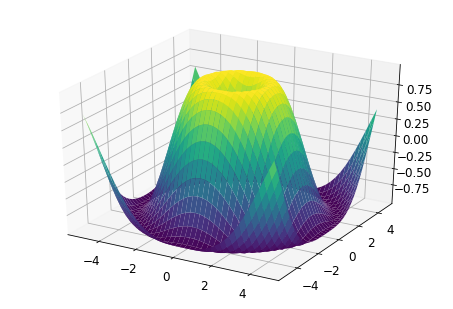

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.viridis)

plt.show()

In [9]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np


def plot_3d_scater(frame_particle):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    x = list(map(float,frame_particle[:,0]))
    y = list(map(float,frame_particle[:,1]))
    z = list(map(float,frame_particle[:,2]))
    ax.scatter(x, y, z, c="b", marker='o')

    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')

    plt.show()

In [10]:
particle_path_2000 = os.path.join(data_dir_path, "particles_2000.csv")
file_path = particle_path_2000

In [11]:
frame_particle_2000 = np.loadtxt(file_path, dtype=np.str, delimiter=",")

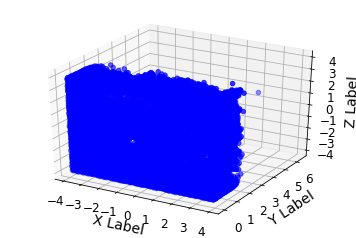

In [12]:
plot_3d_scater(frame_particle_2000)

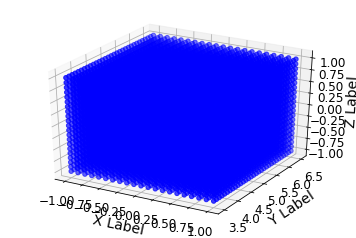

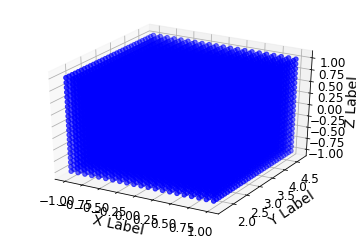

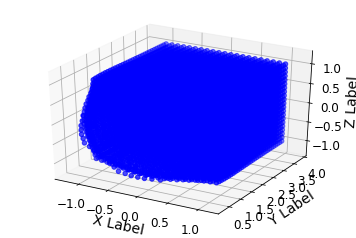

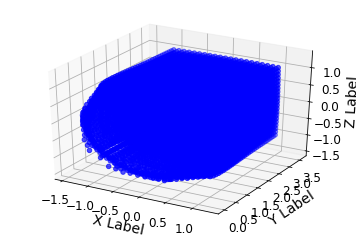

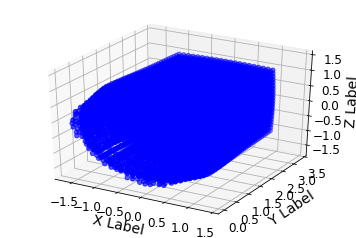

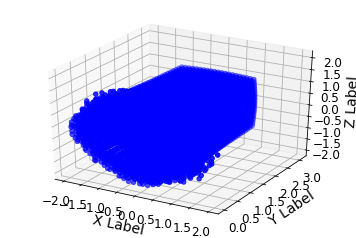

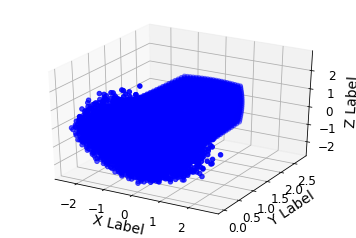

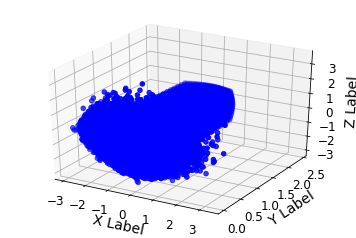

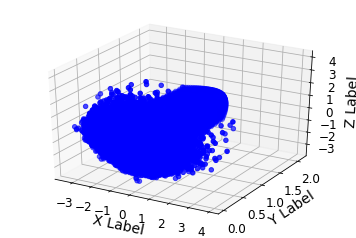

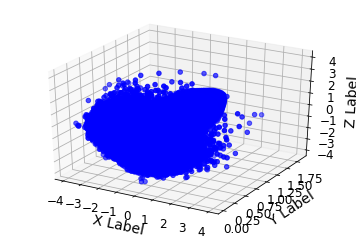

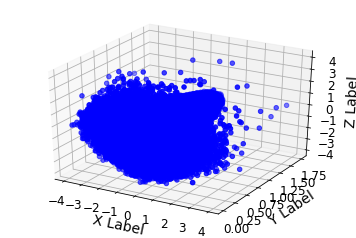

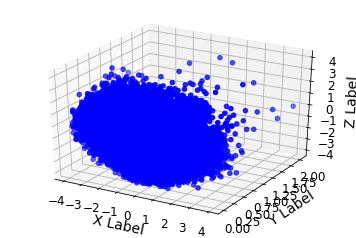

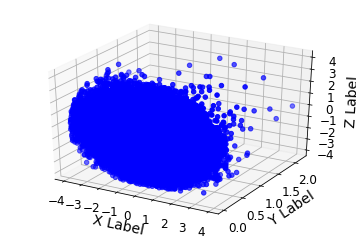

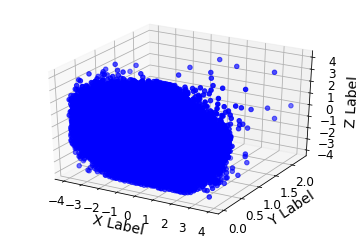

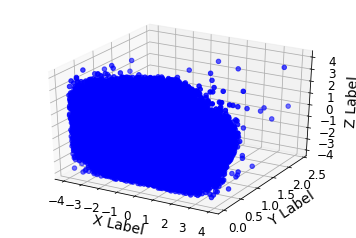

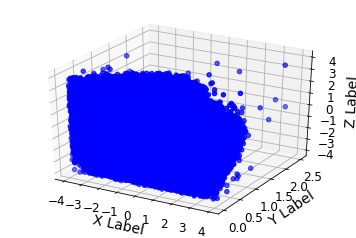

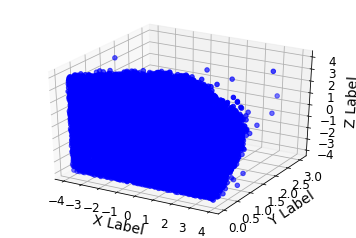

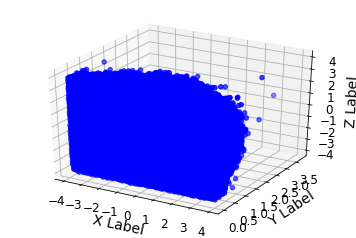

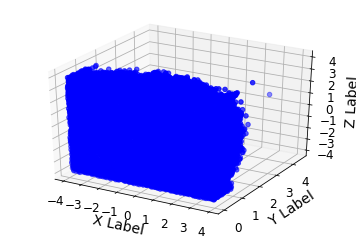

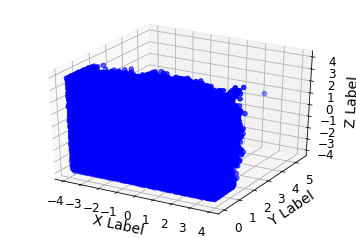

In [13]:
for i in range(0,2000,100):
    file_path = os.path.join(data_dir_path, "particles_%d.csv"%i)
    frame_particle = np.loadtxt(file_path, dtype=np.str, delimiter=",")
    plot_3d_scater(frame_particle)

In [14]:
for i in range(0,20000,1000):
    file_path = os.path.join(data_dir_path, "particles_%d.csv"%i)
    frame_particle = np.loadtxt(file_path, dtype=np.str, delimiter=",")
    print("min:", min(frame_particle[:,0]), min(frame_particle[:,1]), min(frame_particle[:,2]),\
         "max:", max(frame_particle[:,0]), max(frame_particle[:,1]), max(frame_particle[:,2]))

min: -0.1 3.5 -0.1 max: 1 6.5 1
min: -0.000535654 0.0250744 -0.000898337 max: 3.9487 1.74371 3.94835
min: -0.000345814 0.0120475 -0.000303656 max: 3.91927 6.37697 3.92871
min: -0.000273494 0.013459 -0.000349613 max: 3.92169 7.40794 6.23204
min: -0.000105393 0.0409406 -0.00154374 max: 3.91751 1.17968 3.91805
min: -0.000220002 0.0413777 -0.000245679 max: 3.92176 1.18014 3.92646
min: -0.00022026 0.0426341 -0.000136114 max: 9.82893e-005 1.18546 3.92014
min: -0.000803374 0.0448839 -0.000250499 max: 3.92009 1.18059 3.91991
min: -0.000758834 0.0439617 -0.000128412 max: 3.91812 1.18545 3.91925
min: -0.000456976 0.0452034 -0.00149702 max: 3.9179 1.17525 3.91974
min: -0.00060651 0.0462556 -0.000447738 max: 3.9189 1.18302 3.92074
min: -0.000433009 0.0481127 -0.000404265 max: 3.91841 1.18092 3.919
min: -0.000192264 0.046027 -0.000368901 max: 3.91988 1.18175 3.92112
min: -0.000188811 0.0449785 -0.000322628 max: 3.91784 1.18258 3.92365
min: -0.000347158 0.0466085 -0.000215837 max: 3.91722 1.17931 3.

In [60]:
# selected pirticle
import random

# 密度，需要进行采样，但这里对所有的粒子进行了求解
f = open("feature_vectors.csv","w+") 
f_labels = open("feature_vectors_labels.csv","w+") 
number_particles = len(frame_particle)
for i in range(number_particles):
    f.writelines(str(i))
    f.writelines(",")
    for num in range(100):
        theta = random.random()
        for j in range(number_particles):
            if i == j:
                continue

            if j == number_particles-1:
                j = number_particles-100

            if j == i+1:
                # 表面张力
                delta_px = theta*(float(frame_particle[i,0]) - float(frame_particle[j,0]))
                delta_py = theta*(float(frame_particle[i,1]) - float(frame_particle[j,1]))
                delta_pz = theta*(float(frame_particle[i,2])- float(frame_particle[j,2]))

                # 粘性力
                delta_vx = theta*(float(frame_particle[i,0]) - float(frame_particle[j,0]))
                delta_vy = theta*(float(frame_particle[i,1]) - float(frame_particle[j,1]))
                delta_vz = theta*(float(frame_particle[i,2]) - float(frame_particle[j,2]))

                #密度
                density = theta*(delta_px + delta_py + delta_pz)

                # 压强力
                px = theta*(density*delta_px)
                py = theta*(density*delta_py)
                pz = theta*(density*delta_pz)

                all_props = [delta_px, delta_py, delta_pz, delta_vx, delta_vy, delta_vz, density, px, py, pz]
                all_props = ",".join(list(map(str,all_props)))

        f.writelines(all_props)
        f.writelines(',')
        f.flush()
    f.writelines('\n')
#     f_labels.write(",".join(list(map(str,[i,frame_particle[i,9], frame_particle[i,10], frame_particle[i,11]]))))
f.close()
# f_labels

In [16]:
frame_particle[0,:]

array(['-3.57195', '0.0593277', '-3.76912', '0.0927311', '0.123508',
       '0.0306183', '1000.12', '1215.25', '1', '-11.3776', '-6.78418',
       '-11.8585', ''],
      dtype='<U13')

In [18]:
f = open("feature_vectors.csv","w+") 
f.write("1,")
f.write("1,")
f.write("1,")
f.write("\n")

1

In [48]:
frame_particle.shape

(13668, 13)

In [24]:
",".join(["1", "2" , "3"])

'1,2,3'

In [26]:
",".join(list(map(str,[1,2,3])))

'1,2,3'

In [33]:
np.ndarray(list(map(float,frame_particle)))

TypeError: only length-1 arrays can be converted to Python scalars

In [35]:
frame_particle.dtype

dtype('<U13')

In [50]:
",".join(list(map(str,[i,frame_particle[i,9], frame_particle[i,10], frame_particle[i,11]])))

'0,-11.3776,-6.78418,-11.8585'

In [52]:
f = open("hello.csv","w+")

In [53]:
f.writelines("1")
f.writelines("2")

In [54]:
f.flush()